In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [ ]:
type(X_train)

numpy.ndarray

In [8]:
X_train[10].shape

(28, 28)

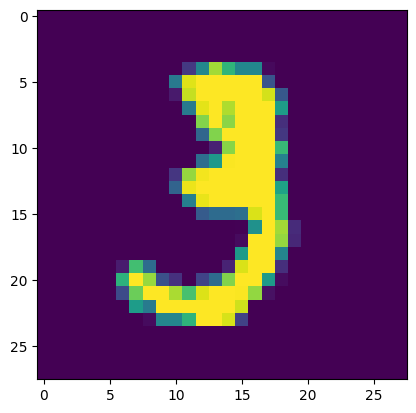

In [7]:
plt.imshow(X_train[10])
plt.show()


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(Y_train,Y_test)

[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]


In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation="relu"),
                          keras.layers.Dense(50, activation="relu"),
                          keras.layers.Dense(units=10,activation="sigmoid")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8529 - loss: 0.5059
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9570 - loss: 0.1451
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9690 - loss: 0.1050
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9756 - loss: 0.0832
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9800 - loss: 0.0685
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9855 - loss: 0.0481
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9876 - loss: 0.0407
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9889 - loss: 0.0355
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0311


In [13]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1418
0.96670001745224


In [ ]:
print(X_test.shape)

(10000, 28, 28)


In [ ]:
X_test[10].shape

(28, 28)

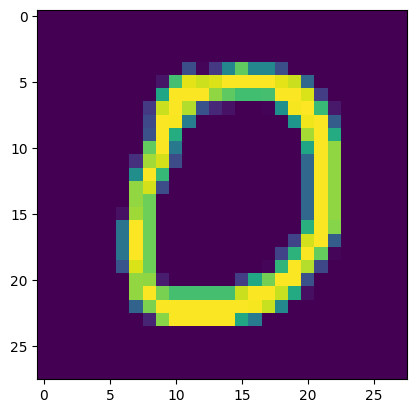

In [ ]:
plt.imshow(X_test[10])
plt.show()

In [ ]:
Y_test[10]

np.uint8(0)

In [ ]:
Y_prediction = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
Y_prediction.shape

(10000, 10)

In [ ]:
Y_prediction[10]

array([9.99999225e-01, 1.30752528e-06, 8.02610517e-02, 2.63737980e-04,
       2.70888433e-02, 3.98210390e-03, 6.12157919e-02, 8.65602866e-02,
       1.20456465e-01, 9.59421933e-01], dtype=float32)

In [ ]:
np.argmax(Y_prediction[10])

np.int64(0)

In [ ]:
Y_pred_label = [np.argmax(i) for i in Y_prediction]

In [ ]:
conf_mat = confusion_matrix(Y_test,Y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 959    0    3    2    2    2    1    0    1   10]
 [   0 1127    2    1    0    0    2    0    3    0]
 [   3    2  994   18    3    1    2    5    4    0]
 [   0    0    0  997    2    3    0    3    2    3]
 [   1    1    1    0  969    0    2    1    0    7]
 [   2    0    0   24    3  850    6    1    3    3]
 [   3    3    0    1    7    9  930    0    5    0]
 [   1    5    8    6    2    1    0  987    2   16]
 [   2    3    5   18    3    4    4    3  930    2]
 [   1    3    0    8   27    5    1    1    6  957]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

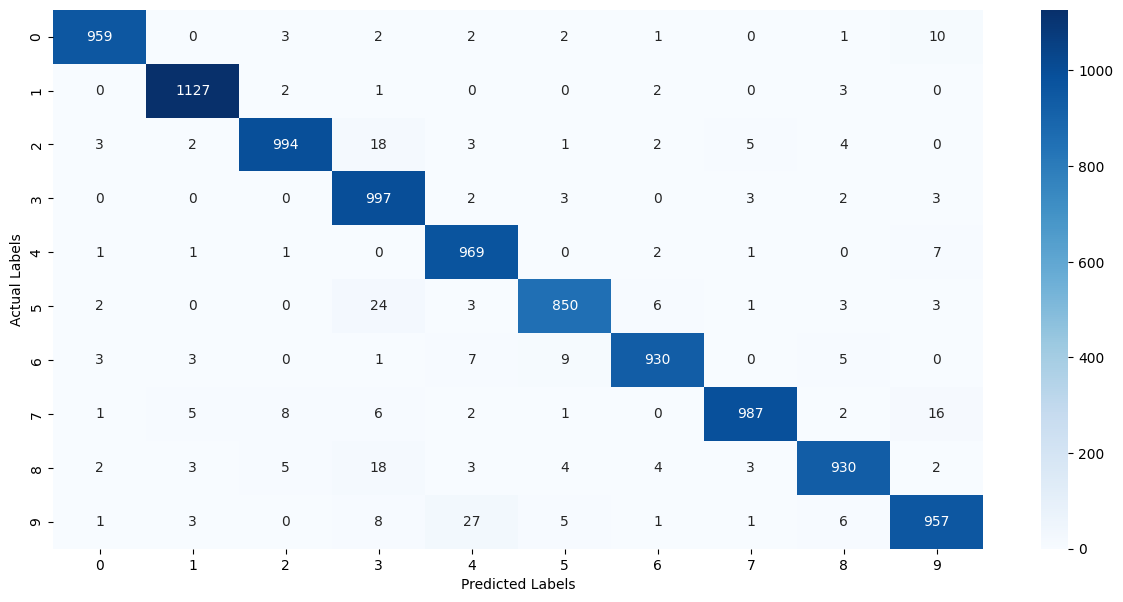

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt="d",cmap="Blues")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

In [ ]:
input_img_path = "/content/MNIST_digit.png"
img = cv2.imread(input_img_path)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


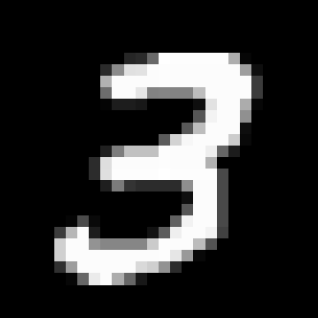

In [ ]:
cv2_imshow(img)

In [ ]:
gray_scale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
gray_scale.shape

(318, 318)

In [ ]:
img_resize = cv2.resize(gray_scale,(28,28))

In [ ]:
input_img = img_resize/255

In [ ]:
type(input_img)

numpy.ndarray

In [ ]:
input_img = np.reshape(input_img,[1,28,28])

In [ ]:
prediction = model.predict(input_img)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[5.0542877e-12 2.9121769e-05 2.7123258e-01 1.0000000e+00 5.9796677e-14
  2.3726432e-03 6.0003546e-26 1.2453975e-01 2.3927437e-01 4.2392510e-01]]


In [1]:
output = np.argmax(prediction)

NameError: name 'np' is not defined

In [ ]:
print(output)

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)